In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dealership_df = pd.read_csv('Merged Data dealrship.csv')
appointment_df = pd.read_csv('Merged_Appointment.csv')

In [7]:
(dealership_df.head(), appointment_df.head())

(                          Date           CUSTOMER'S NAME    Delarship    YEAR  \
 0  Saturday, February 24, 2024              JAYRAJ FAKIR    Kitchener  2020.0   
 1  Saturday, February 24, 2024         SAVANNA LINKLATER  Mississauga  2022.0   
 2  Saturday, February 24, 2024            LAURIE CHILCO   Mississauga  2021.0   
 3  Saturday, February 24, 2024  NATHANIEL JERMAN VASSELL  Mississauga  2020.0   
 4  Saturday, February 24, 2024               KYLE MARFIL  Mississauga  2021.0   
 
          MAKE     MODEL       KM  COLOR   STOCK SERVICE READY TIME  \
 0         KIA  SPORTAGE  61846.0  WHITE  13307F         9:00:00 AM   
 1   CHEVORLET   EQUINOX  18402.0  WHITE   13645         8:00:00 AM   
 2     TOYOTA     RAV 4   72008.0  WHITE   13373        11:00:00 AM   
 3        AUDI        A3  45541.0  BLACK  13758F        12:00:00 PM   
 4  MITSUBISHI       RVR  62017.0  WHITE   13530        12:00:00 PM   
 
   DELIVERY DATE                       Date2 SALES PERSON Type of Payment  \
 

In [8]:
# Standardizing the 'CUSTOMER'S NAME' and 'CUSTOMER NAME' columns for comparison by converting them to uppercase and stripping any leading/trailing spaces
dealership_df["CUSTOMER'S NAME"] = dealership_df["CUSTOMER'S NAME"].str.upper().str.strip()
appointment_df["CUSTOMER NAME"] = appointment_df["CUSTOMER NAME"].str.upper().str.strip()

# Finding common customer names in both datasets
common_customers = pd.merge(dealership_df, appointment_df, left_on="CUSTOMER'S NAME", right_on="CUSTOMER NAME", how='inner')

# Extracting unique common customer names
unique_common_customers = common_customers["CUSTOMER'S NAME"].unique()

unique_common_customers


array(['KYLE MARFIL', 'CHRISTINA', 'HARDEEP SINGH', 'JASPREET SINGH',
       'MARIO', 'JASKIRAT SINGH', 'KANWAL RATHORE', 'JAIMIE PIPER',
       'OMER', 'MANDEEP SINGH', 'DAISY', 'CHRISTOPHER', 'KARANVEER SINGH',
       'JASPREET KAUR', 'ADAM JEZEWSKI', 'ANURAG', 'LOVEDEEP SINGH',
       'KASHISH', 'ANIRUDH NAUTIYAL', 'JASKARAN SINGH', 'ANMOL SINGH',
       'GURPREET SINGH', 'JULIE', 'NAZALENE KHAN', 'KELSEY',
       'CAMERON WILSON', 'GURKIRAT SINGH', 'JOE', 'JOHN BARRION',
       'HALEY HALTERMAN', 'RUBEN GARCIA', 'HARPREET KAUR', 'NEERAJ',
       'KOMALPREET', 'EUGENIO', 'DALIP RIKHY', 'ANURADHA',
       'RAEZLLE LOZANO', 'WILFRED', 'ARSHDEEP SINGH', 'SIMRANJIT SINGH',
       'JASPAL SINGH', 'MANPREET GILL', 'NAKUL', 'ABHINAV RANA', 'HARMAN',
       'NAVEEN SHARMA', 'AMAN BENNO', 'LINA LESLIE', 'RONAK', 'HADI',
       'AMANDA', 'UMANG', 'PAUL SMITH', 'AMIT', 'GORDON MCKEON',
       'JOHN PAVIC', 'MARGARET LAPIERRE', 'NAVJOT SINGH', 'TROY',
       'NISHANT BHAIRAV', 'ANTONIO PALMA', 

In [9]:
# Count of unique common customer names
total_common_customers = len(unique_common_customers)
total_common_customers


108

In [10]:
# Merge data for common customers focusing on key columns for the analysis
common_customer_analysis = pd.merge(
    appointment_df[['CUSTOMER NAME', 'DATE', 'VEHICLE', 'SHOWED', 'CONFIRMED', 'APPT TIME']],
    dealership_df[['CUSTOMER\'S NAME', 'Date', 'MAKE', 'MODEL', 'YEAR', 'DELIVERY DATE']],
    left_on="CUSTOMER NAME",
    right_on="CUSTOMER'S NAME",
    how='inner'
)

# Rename columns for clarity and consistency
common_customer_analysis.rename(columns={
    'DATE': 'Appointment Date',
    'VEHICLE': 'Appointment Vehicle',
    'SHOWED': 'Appointment Showed',
    'CONFIRMED': 'Appointment Confirmed',
    'APPT TIME': 'Appointment Time',
    'Date': 'Sales Date',
    'MAKE': 'Sales Vehicle Make',
    'MODEL': 'Sales Vehicle Model',
    'YEAR': 'Sales Vehicle Year',
    'DELIVERY DATE': 'Vehicle Delivery Date'
}, inplace=True)

# Display a summary of the merged data for analysis
common_customer_analysis.head(), common_customer_analysis.shape


(    CUSTOMER NAME Appointment Date Appointment Vehicle  Appointment Showed  \
 0          AMANDA       2022-01-05             AUDI A4                 1.0   
 1          GEORGE       2022-01-05        MER 300 SUV                  1.0   
 2  AMANDEEP SINGH       2022-01-07         BLACK C300                  1.0   
 3           RAHUL       2022-01-09       MERCEDES 300                  1.0   
 4         SANDEEP       2022-01-10         HONDA CIVIC                 0.0   
 
   Appointment Confirmed Appointment Time CUSTOMER'S NAME  \
 0             CONFIRMED         13:00:00          AMANDA   
 1             CONFIRMED         15:00:00          GEORGE   
 2             CONFIRMED         15:00:00  AMANDEEP SINGH   
 3             CONFIRMED         15:00:00           RAHUL   
 4               NO SHOW         19:00:00         SANDEEP   
 
                  Sales Date Sales Vehicle Make Sales Vehicle Model  \
 0    Saturday, July 1, 2023               AUDI                  Q5   
 1   Wednesday

In [2]:
import matplotlib.pyplot as plt

# Calculate conversion rate
unique_customers_appointments = data['CUSTOMER NAME'].nunique()
unique_customers_sales = data['CUSTOMER\'S NAME'].nunique()
conversion_rate = unique_customers_sales / unique_customers_appointments

# Calculate show-up rate
total_appointments = data.shape[0]
appointments_showed_up = data[data['SHOWED'] == 1].shape[0]
show_up_rate = appointments_showed_up / total_appointments

# Data for visualization
rates = {'Conversion Rate': conversion_rate, 'Show-Up Rate': show_up_rate}

# Plotting
fig, ax = plt.subplots()
ax.bar(rates.keys(), rates.values(), color=['blue', 'orange'])
ax.set_ylabel('Rate')
ax.set_title('Conversion and Show-Up Rates')

# Display percentages on bars
for i, v in enumerate(rates.values()):
    ax.text(i, v + 0.02, "{:.2%}".format(v), ha='center', va='bottom')

plt.ylim(0, 1.1)  # Set y-axis limit to show percentages clearly
plt.tight_layout()
plt.show()


NameError: name 'data' is not defined

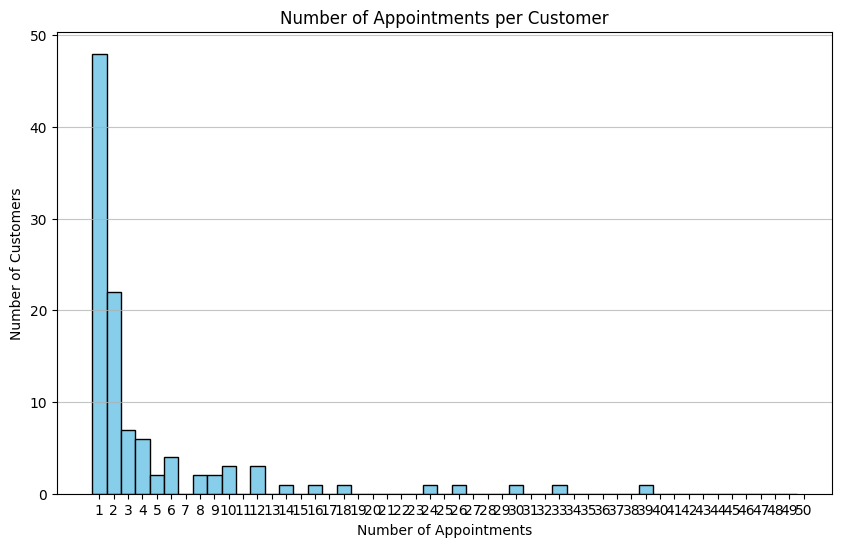

In [12]:
import numpy as np

# 1. Number of Appointments per Customer
appointments_per_customer = common_customer_analysis.groupby('CUSTOMER NAME').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(appointments_per_customer, bins=np.arange(appointments_per_customer.min(), appointments_per_customer.max() + 1) - 0.5, color='skyblue', edgecolor='black')
plt.title('Number of Appointments per Customer')
plt.xlabel('Number of Appointments')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(appointments_per_customer.min(), appointments_per_customer.max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


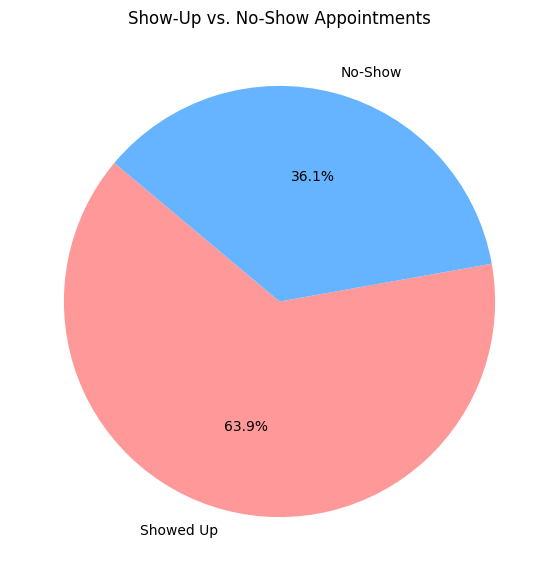

In [13]:
# 2. Show-Up vs. No-Show Appointments
show_up_counts = common_customer_analysis['Appointment Showed'].value_counts()

# Plotting
plt.figure(figsize=(7, 7))
plt.pie(show_up_counts, labels=['Showed Up', 'No-Show'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Show-Up vs. No-Show Appointments')
plt.show()


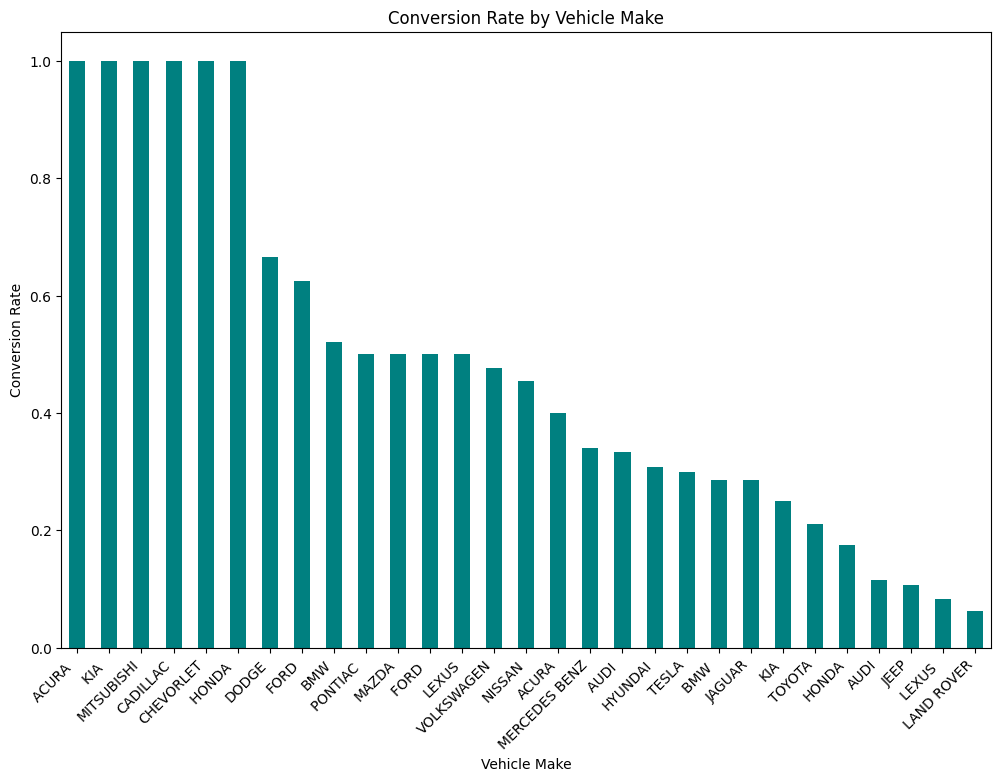

In [14]:
# 3. Conversion Rate by Vehicle Make
# Grouping by Vehicle Make and checking if a sale was made
vehicle_make_appointment = common_customer_analysis.groupby('Sales Vehicle Make').size()
vehicle_make_sales = common_customer_analysis.drop_duplicates(subset=['CUSTOMER NAME', 'Sales Vehicle Make']).groupby('Sales Vehicle Make').size()

# Calculating conversion rate
conversion_rate_by_make = (vehicle_make_sales / vehicle_make_appointment).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
conversion_rate_by_make.plot(kind='bar', color='teal')
plt.title('Conversion Rate by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_20789/4259840119.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_appointment_to_sale = common_customer_analysis.groupby('CUSTOMER NAME').apply(lambda x: (x['Sales Date'] - x['Appointment Date'].min()).dt.days)


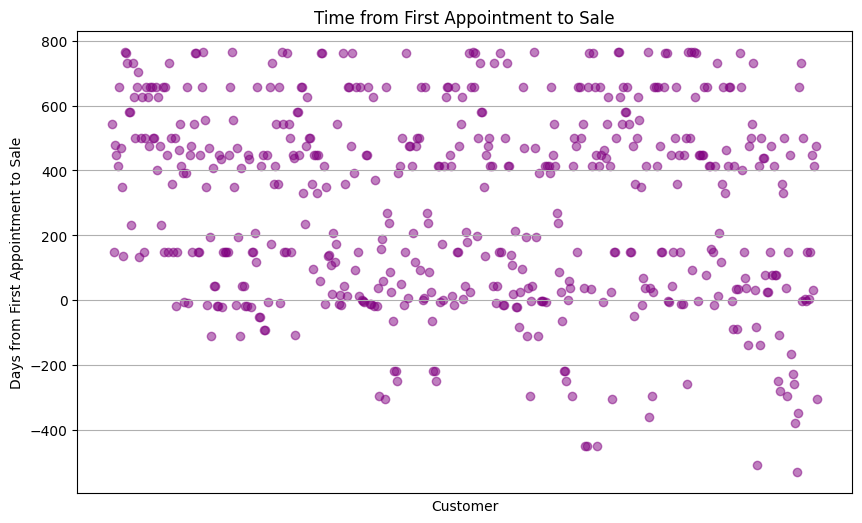

In [15]:
# 4. Time from First Appointment to Sale
# Calculating the difference in days between the first appointment date and the sales date for each customer
common_customer_analysis['Appointment Date'] = pd.to_datetime(common_customer_analysis['Appointment Date'])
common_customer_analysis['Sales Date'] = pd.to_datetime(common_customer_analysis['Sales Date'])
first_appointment_to_sale = common_customer_analysis.groupby('CUSTOMER NAME').apply(lambda x: (x['Sales Date'] - x['Appointment Date'].min()).dt.days)

# Flatten the series to get a list of differences
time_to_sale = first_appointment_to_sale.reset_index(level=0, drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(time_to_sale.index, time_to_sale, color='purple', alpha=0.5)
plt.title('Time from First Appointment to Sale')
plt.xlabel('Customer')
plt.ylabel('Days from First Appointment to Sale')
plt.xticks([])
plt.grid(True)
plt.show()


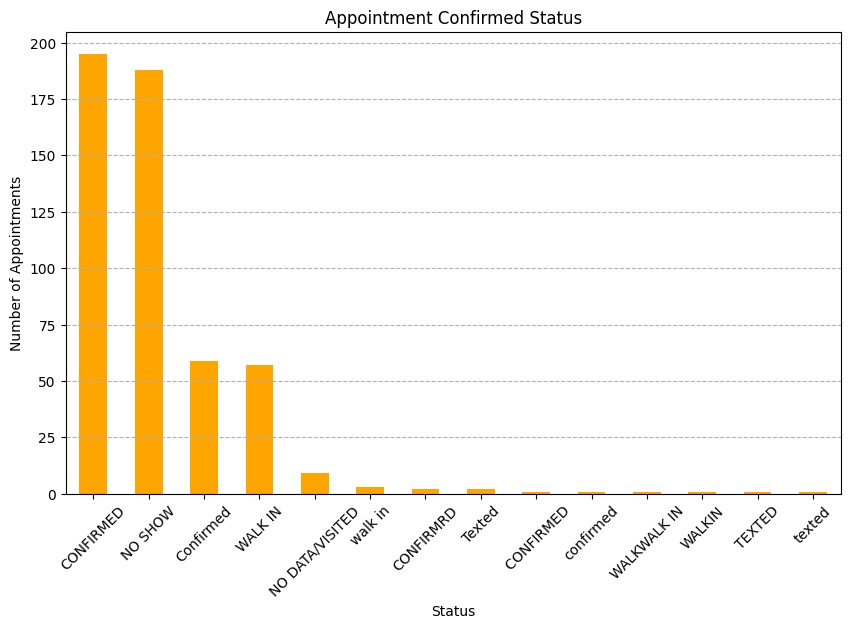

In [16]:
# 5. Appointment Confirmed Status
appointment_status_counts = common_customer_analysis['Appointment Confirmed'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
appointment_status_counts.plot(kind='bar', color='orange')
plt.title('Appointment Confirmed Status')
plt.xlabel('Status')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


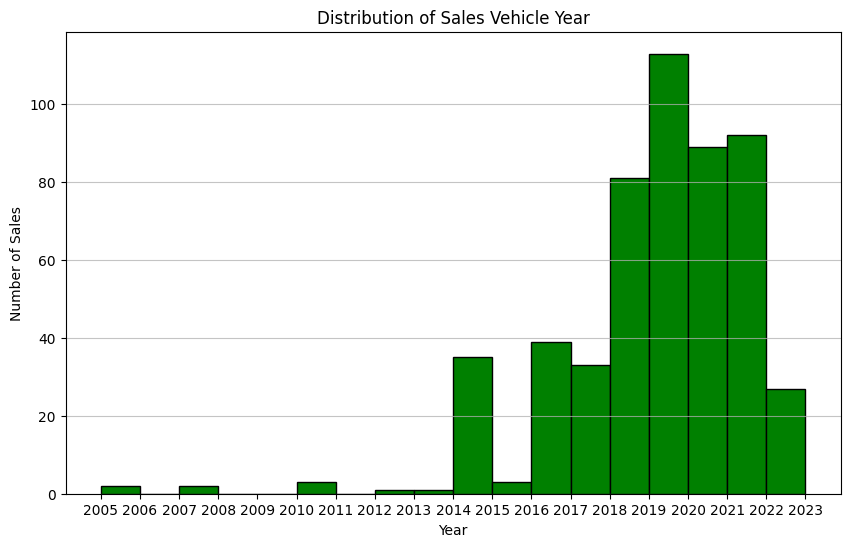

In [17]:
# 1. Sales Vehicle Year Distribution
plt.figure(figsize=(10, 6))
plt.hist(common_customer_analysis['Sales Vehicle Year'].dropna(), bins=np.arange(common_customer_analysis['Sales Vehicle Year'].min(), common_customer_analysis['Sales Vehicle Year'].max() + 1), color='green', edgecolor='black')
plt.title('Distribution of Sales Vehicle Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.xticks(np.arange(common_customer_analysis['Sales Vehicle Year'].min(), common_customer_analysis['Sales Vehicle Year'].max() + 1, 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


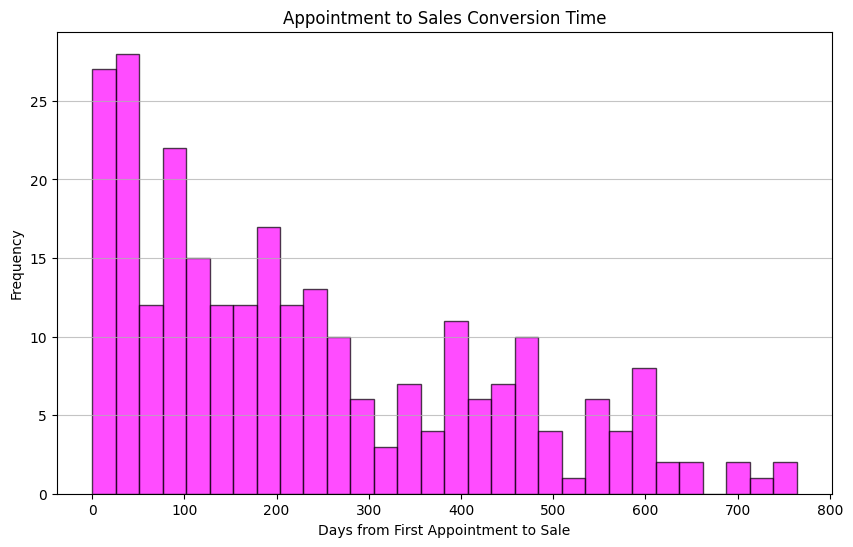

In [18]:
# 2. Appointment to Sales Conversion Time
# Calculating days from the first appointment to the sale for each customer
common_customer_analysis['Days from Appointment to Sale'] = (common_customer_analysis['Sales Date'] - common_customer_analysis['Appointment Date']).dt.days

# Filtering out negative values that may result from data inconsistencies
conversion_time = common_customer_analysis[common_customer_analysis['Days from Appointment to Sale'] >= 0]['Days from Appointment to Sale']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(conversion_time, bins=30, color='magenta', edgecolor='black', alpha=0.7)
plt.title('Appointment to Sales Conversion Time')
plt.xlabel('Days from First Appointment to Sale')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


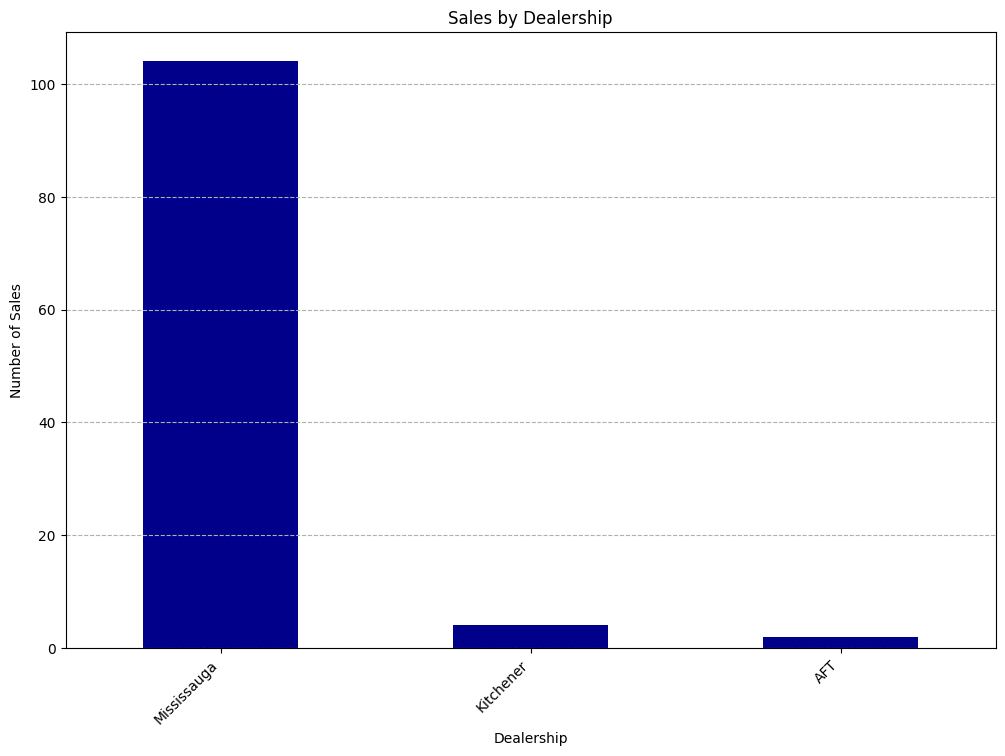

In [19]:
# Since the dealership information is not present in the common customer analysis dataset, we need to merge it again with the original dealership data for this analysis.
dealership_sales = pd.merge(common_customer_analysis, dealership_df[['CUSTOMER\'S NAME', 'Delarship']], on="CUSTOMER'S NAME", how='left').drop_duplicates(subset=['CUSTOMER\'S NAME', 'Delarship'])

# Counting sales by dealership
sales_by_dealership = dealership_sales['Delarship'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
sales_by_dealership.plot(kind='bar', color='darkblue')
plt.title('Sales by Dealership')
plt.xlabel('Dealership')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


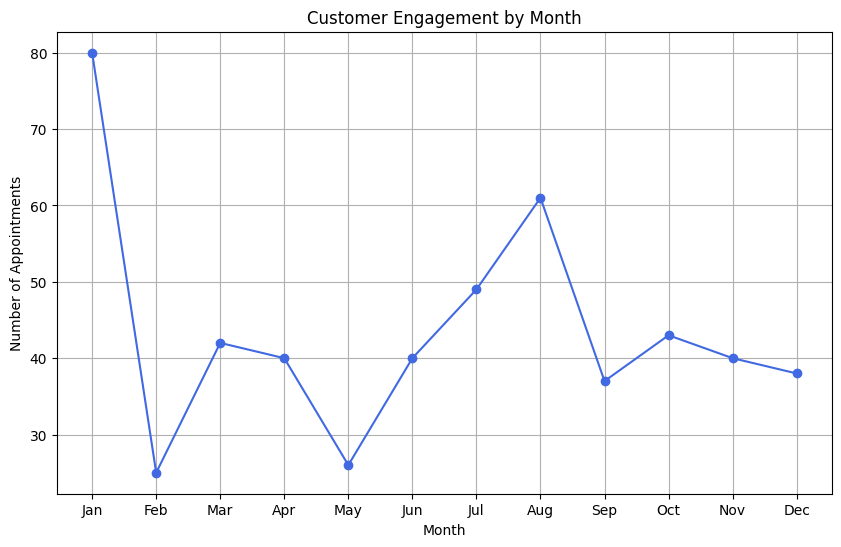

In [20]:
# Extracting month from the appointment date for trend analysis
common_customer_analysis['Appointment Month'] = common_customer_analysis['Appointment Date'].dt.month

# Counting appointments by month
appointments_by_month = common_customer_analysis.groupby('Appointment Month').size()

# Plotting
plt.figure(figsize=(10, 6))
appointments_by_month.plot(kind='line', marker='o', color='royalblue')
plt.title('Customer Engagement by Month')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


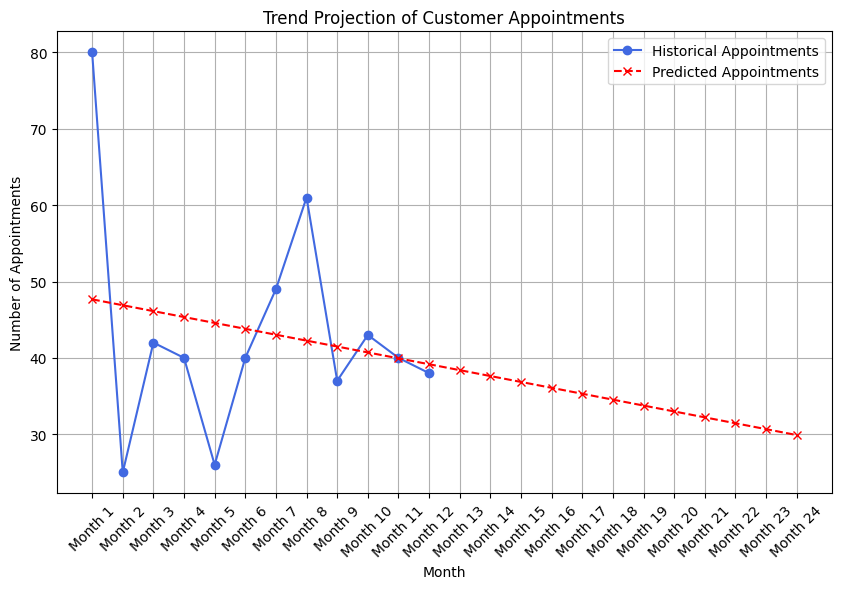

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data for trend projection
X = np.array(appointments_by_month.index).reshape(-1, 1)  # Month numbers as features
y = appointments_by_month.values  # Appointment counts as the target

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting future months
future_months = np.array(range(1, 25)).reshape(-1, 1)  # Predicting the next 12 months, extending beyond the current dataset
future_appointments_pred = model.predict(future_months)

# Plotting the historical data and future predictions
plt.figure(figsize=(10, 6))
plt.plot(appointments_by_month.index, y, label='Historical Appointments', marker='o', color='royalblue')
plt.plot(future_months, future_appointments_pred, label='Predicted Appointments', linestyle='--', color='red', marker='x')
plt.title('Trend Projection of Customer Appointments')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(np.arange(1, 25), labels=[f'Month {i}' for i in range(1, 25)], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


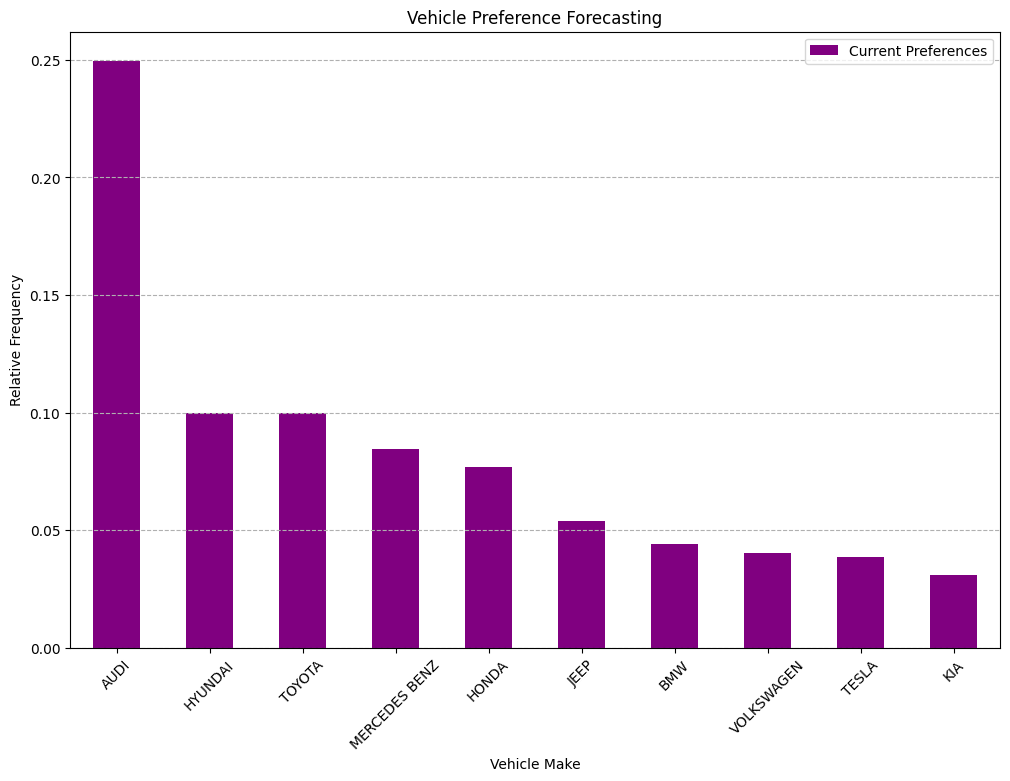

In [23]:
# Current preferences for vehicle makes (using the last 12 months as a reference)
vehicle_preferences = common_customer_analysis['Sales Vehicle Make'].value_counts(normalize=True).head(10)  # Top 10 for simplicity

# Assuming these preferences remain constant for the projection
future_vehicle_preferences = vehicle_preferences  # Simplified assumption

# Visualizing current preferences
plt.figure(figsize=(12, 8))
vehicle_preferences.plot(kind='bar', color='purple', label='Current Preferences')
plt.title('Vehicle Preference Forecasting')
plt.xlabel('Vehicle Make')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()


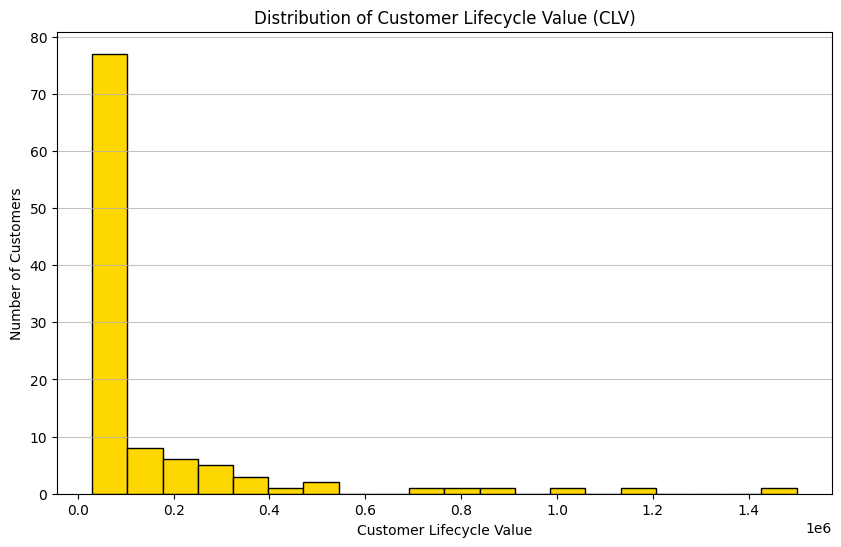

count    1.080000e+02
mean     1.447222e+05
std      2.432662e+05
min      3.000000e+04
25%      3.000000e+04
50%      6.000000e+04
75%      1.200000e+05
max      1.500000e+06
dtype: float64

In [25]:
# Assuming an average transaction value (ATV) - this could be refined with actual sales data
average_transaction_value = 30000  # Placeholder value

# Counting the number of purchases (transactions) per customer
transactions_per_customer = common_customer_analysis.groupby('CUSTOMER NAME').size()

# Calculating CLV as the product of transactions and average transaction value
clv_per_customer = transactions_per_customer * average_transaction_value

# Visualizing CLV distribution
plt.figure(figsize=(10, 6))
plt.hist(clv_per_customer, bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Customer Lifecycle Value (CLV)')
plt.xlabel('Customer Lifecycle Value')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Summary statistics for CLV
clv_summary = clv_per_customer.describe()
clv_summary


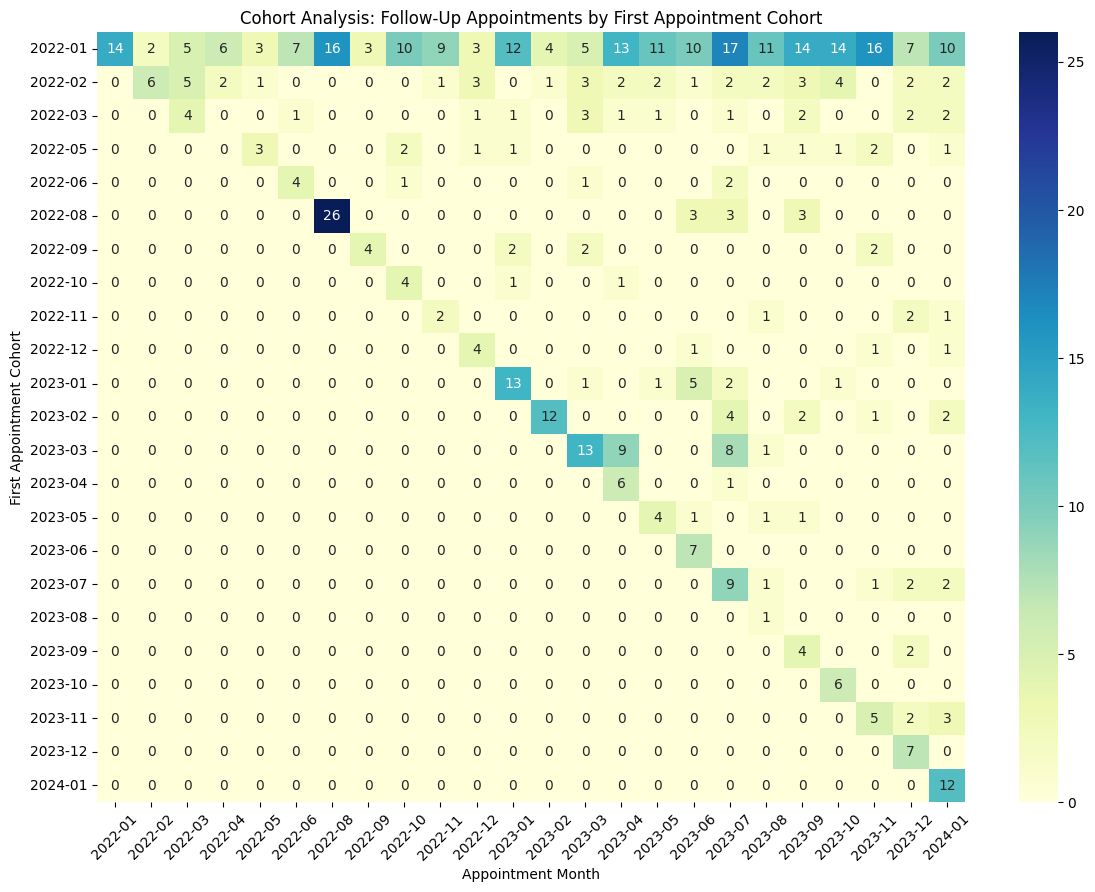

In [26]:
# Simplified Cohort Analysis: Group by first appointment month and count follow-ups
common_customer_analysis['First Appointment Month'] = common_customer_analysis.groupby('CUSTOMER NAME')['Appointment Date'].transform('min').dt.to_period('M')
common_customer_analysis['Appointment Month'] = common_customer_analysis['Appointment Date'].dt.to_period('M')

# Counting follow-up interactions by cohort
cohort_follow_ups = common_customer_analysis.groupby(['First Appointment Month', 'Appointment Month']).size().unstack(fill_value=0)

# Visualizing the cohort analysis
plt.figure(figsize=(14, 10))
sns.heatmap(cohort_follow_ups, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Cohort Analysis: Follow-Up Appointments by First Appointment Cohort')
plt.xlabel('Appointment Month')
plt.ylabel('First Appointment Cohort')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


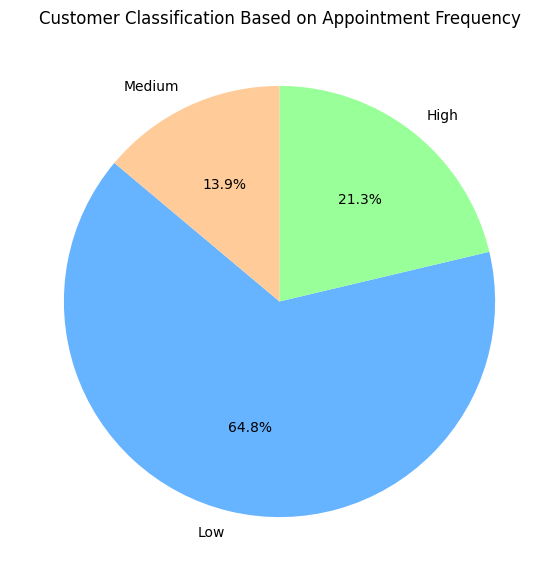

In [29]:
# 3. Conceptual Visualization for Predictive Modeling (using appointment frequency as a proxy)
# Classifying customers based on the frequency of their appointments
appointment_frequencies = common_customer_analysis['CUSTOMER NAME'].value_counts()

# Classifying as High, Medium, or Low frequency
customer_classification = pd.cut(appointment_frequencies, bins=[0, 2, 5, max(appointment_frequencies)], right=True, labels=['Low', 'Medium', 'High'])

# Counting classifications
classification_counts = customer_classification.value_counts()

# Visualizing customer classifications
plt.figure(figsize=(7, 7))
classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Customer Classification Based on Appointment Frequency')
plt.ylabel('')  # Remove the y-label as it's not relevant for pie chart
plt.show()


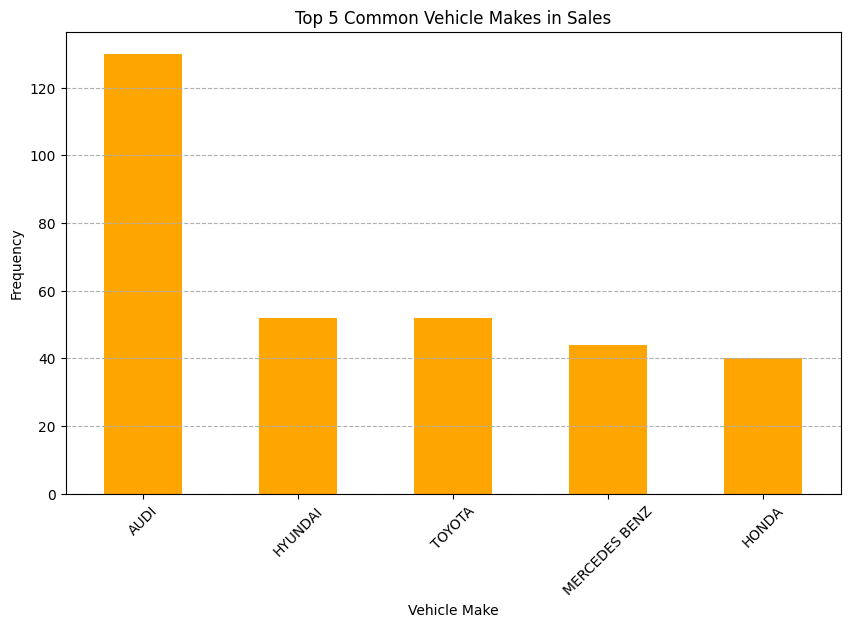

In [30]:
# 4. Simplified Market Basket Analysis - Identifying Common Vehicle Makes
common_vehicle_makes = common_customer_analysis['Sales Vehicle Make'].value_counts().head(5)

# Visualizing the most common vehicle makes
plt.figure(figsize=(10, 6))
common_vehicle_makes.plot(kind='bar', color='orange')
plt.title('Top 5 Common Vehicle Makes in Sales')
plt.xlabel('Vehicle Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


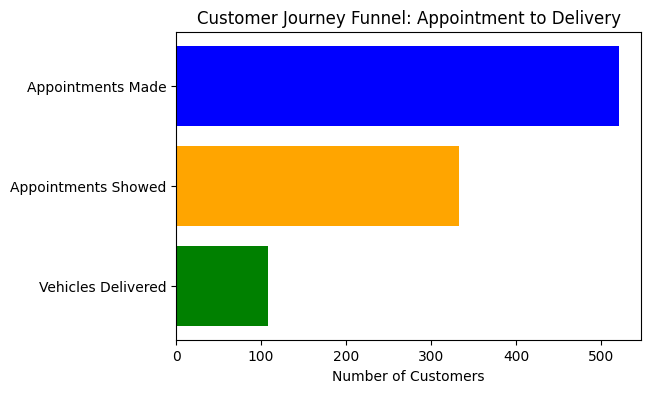

In [31]:
# Funnel Chart Data Preparation
# Assuming all appointments lead to a potential sale, and using 'SHOWED' as an indication of serious interest
appointments_total = len(common_customer_analysis)
appointments_showed = common_customer_analysis[common_customer_analysis['Appointment Showed'] == 1.0].shape[0]
deliveries_total = common_customer_analysis['CUSTOMER NAME'].nunique()  # Assuming unique customer names indicate completed deliveries

funnel_stages = ['Appointments Made', 'Appointments Showed', 'Vehicles Delivered']
funnel_values = [appointments_total, appointments_showed, deliveries_total]

# Plotting the Funnel Chart as a Bar Chart (due to environment limitations for actual funnel charts)
plt.figure(figsize=(6, 4))
plt.barh(funnel_stages, funnel_values, color=['blue', 'orange', 'green'])
plt.xlabel('Number of Customers')
plt.title('Customer Journey Funnel: Appointment to Delivery')
plt.gca().invert_yaxis()  # Invert y-axis to make it look more like a funnel
plt.show()


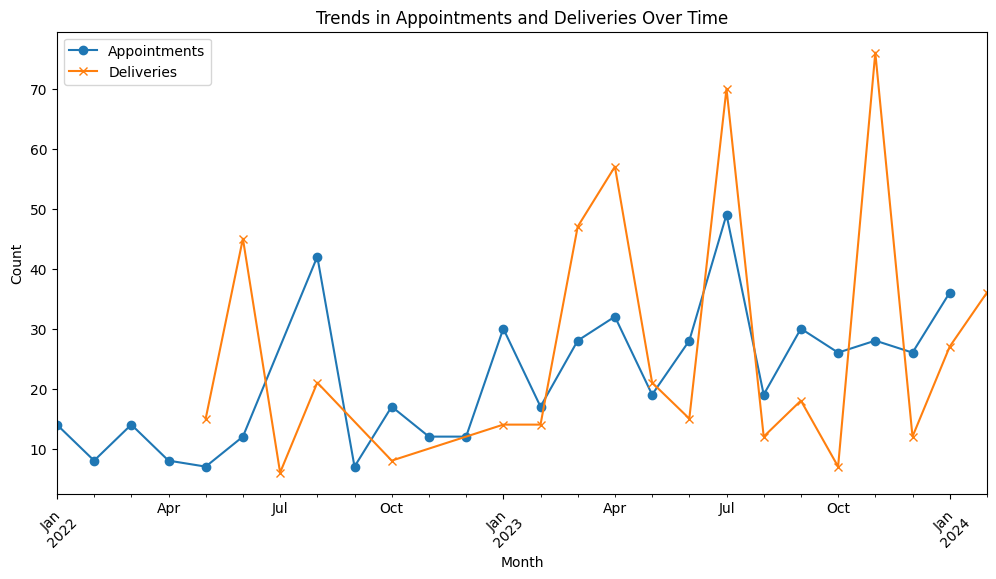

In [32]:
# Preparing data for the line graph
appointments_by_month = common_customer_analysis.groupby(common_customer_analysis['Appointment Date'].dt.to_period('M')).size()
deliveries_by_month = common_customer_analysis.groupby(common_customer_analysis['Sales Date'].dt.to_period('M')).size()

# Plotting the Line Graph
plt.figure(figsize=(12, 6))
appointments_by_month.plot(label='Appointments', marker='o')
deliveries_by_month.plot(label='Deliveries', marker='x')
plt.title('Trends in Appointments and Deliveries Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


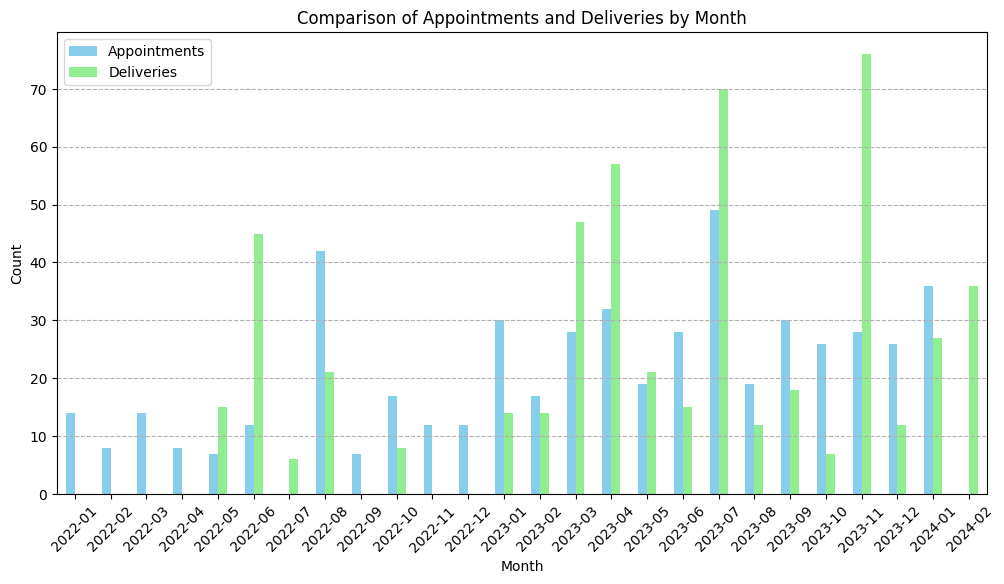

In [33]:
# Preparing data for the bar chart
# Aggregating counts by month for appointments and deliveries
appointments_summary = common_customer_analysis['Appointment Date'].dt.to_period('M').value_counts().sort_index()
deliveries_summary = common_customer_analysis['Sales Date'].dt.to_period('M').value_counts().sort_index()

# Converting to DataFrame for easier plotting
comparison_df = pd.DataFrame({'Appointments': appointments_summary, 'Deliveries': deliveries_summary}).fillna(0)

# Plotting the Bar Chart
comparison_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparison of Appointments and Deliveries by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()
